### TO DO LIST:
<ol type="decimal">
  <li>Preparação e exploração dos dados</li>
  <li>Métricas de qualidade e validação de modelos</li>
  <li>Árvores de decisão</li>
  <li>Regressão linear e logística</li>
</ol>

# TAREFA DATASET GRUPO

**Nota: Melhorar Descrição** 

Para esta fase, decidimos escolher um dataset referente aos valores dos mercados de futebol na Europa. 
Pode ser encontrado neste link: https://www.kaggle.com/datasets/aricht1995/european-football-market-values 
O objetivo desta fase é, através deste dataset, inferir acerca do valor de mercado de um jogador de futebol.

**1.** Importar as bibliotecas essenciais do Python para a elaboração desta tarefa

In [99]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

**2.** Carregar o dataset para um dataframe da biblioteca Panda 

In [100]:
df = pd.read_csv('docs/european_rosters.csv', encoding="utf-8", skipinitialspace=True)

**3.** Obtenção de informação acerca do dataset: tipos de dados das features, conteúdo do dataset e estatística

* tipos de dados das features;

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FullName                           2052 non-null   object 
 1   PlayerName                         4308 non-null   object 
 2   Affiliation                        4308 non-null   object 
 3   League                             4308 non-null   object 
 4   Jersey                             4239 non-null   object 
 5   Birth Date                         4308 non-null   object 
 6   Age                                4308 non-null   int64  
 7   birthPlace                         4150 non-null   object 
 8   Height (meters)                    4225 non-null   float64
 9   Citizenship 1                      4298 non-null   object 
 10  Citizenship 2                      742 non-null    object 
 11  Position                           4240 non-null   objec

* conteúdo do dataset;

In [102]:
df.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,Citizenship 2,Position,Position 2,Foot,Agent,JoinedClub,LastExtension,ContractExpiration,PlayerSponsor,Youth Club 1,Youth Club 2,Youth Club 3,Youth Club 4,Youth Club 5,Youth Club 6,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,Martinique,Forward,Centre-Forward,right,NaN,NaN,NaN,30.06.2023,NaN,ES Fréjus (2001–2003),OGC Nizza (2003–2006),NaN,NaN,NaN,NaN,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,NaN,Defender,Right-Back,right,Kögl & Partner GmbH,NaN,NaN,30.06.2022,NaN,SV Waldperlach (-2001),FC Bayern München (2001-2013),NaN,NaN,NaN,NaN,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,NaN,Midfielder,Defensive Midfield,right,SportPlus Football ...,"Jul 1, 2019",NaN,30.06.2023,NaN,KV Oostende (-07/2002),FC BrÃ¼gge,NaN,NaN,NaN,NaN,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,NaN,Goalkeeper,Goalkeeper,right,PRO FC,"Jul 1, 2018",NaN,30.06.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,NaN,Midfielder,Right Midfield,right,DC International ...,NaN,NaN,30.06.2021,NaN,SC Weiler-Volkhoven (1997-2001),1.FC Köln (2001-2009),NaN,NaN,NaN,NaN,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


* estatística;

In [103]:
df.describe()

,Age,Height (meters),Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros),Highest Market Value (Euros),NationalTeamCaps
count,4308.000000,4225.000000,4308.000000,4.289000e+03,4.308000e+03,4.091000e+03,4308.000000
mean,25.451718,1.825931,2.518802,7.714625e+06,7.812063e+06,9.992899e+06,11.292943
std,4.429018,0.066534,10.159712,1.474037e+07,1.741673e+07,1.656523e+07,20.133501
min,16.000000,1.590000,0.000000,2.500000e+04,0.000000e+00,2.500000e+04,0.000000
25%,22.000000,1.780000,0.000000,7.000000e+05,0.000000e+00,1.200000e+06,0.000000
50%,25.000000,1.830000,0.000000,2.500000e+06,1.000000e+06,4.000000e+06,3.000000
75%,29.000000,1.870000,2.000000,8.000000e+06,7.957500e+06,1.200000e+07,12.000000
max,42.000000,2.040000,255.000000,2.000000e+08,3.102000e+08,2.000000e+08,176.000000


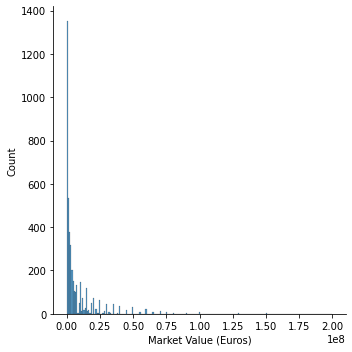

In [104]:
sns.displot(df['Market Value (Euros)'])

In [105]:
df.Agent.isna().sum()

689

**4.** Preparação dos dados

In [106]:
df.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,Citizenship 2,Position,Position 2,Foot,Agent,JoinedClub,LastExtension,ContractExpiration,PlayerSponsor,Youth Club 1,Youth Club 2,Youth Club 3,Youth Club 4,Youth Club 5,Youth Club 6,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,Martinique,Forward,Centre-Forward,right,NaN,NaN,NaN,30.06.2023,NaN,ES Fréjus (2001–2003),OGC Nizza (2003–2006),NaN,NaN,NaN,NaN,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,NaN,Defender,Right-Back,right,Kögl & Partner GmbH,NaN,NaN,30.06.2022,NaN,SV Waldperlach (-2001),FC Bayern München (2001-2013),NaN,NaN,NaN,NaN,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,NaN,Midfielder,Defensive Midfield,right,SportPlus Football ...,"Jul 1, 2019",NaN,30.06.2023,NaN,KV Oostende (-07/2002),FC BrÃ¼gge,NaN,NaN,NaN,NaN,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,NaN,Goalkeeper,Goalkeeper,right,PRO FC,"Jul 1, 2018",NaN,30.06.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,NaN,Midfielder,Right Midfield,right,DC International ...,NaN,NaN,30.06.2021,NaN,SC Weiler-Volkhoven (1997-2001),1.FC Köln (2001-2009),NaN,NaN,NaN,NaN,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


In [107]:
#Remoção de algumas features que considerámos desnecessárias
remove_features_list = ["FullName", "PlayerName", "Jersey", "Birth Date", "birthPlace","Citizenship 1",
                        "Citizenship 2", "JoinedClub", "LastExtension", "ContractExpiration", "Youth Club 3",
                        "Youth Club 4", "Youth Club 5", "Youth Club 6", "Youth Club 7", "Last Updated Date", 
                        "Highest Market Value (Euros)", "Highest Market Value Date", "NationalTeamCaps", "MostRecentInjury"]
for ft in remove_features_list:
    df = df.drop(ft, axis=1)

In [108]:
# Remoção de registos duplicados (caso hajam)
df.drop_duplicates()

,Affiliation,League,Age,Height (meters),Position,Position 2,Foot,Agent,PlayerSponsor,Youth Club 1,Youth Club 2,nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros)
0,1. FC Koln,Bundesliga,31,1.87,Forward,Centre-Forward,right,NaN,NaN,ES Fréjus (2001–2003),OGC Nizza (2003–2006),France,1,7000000.0,45700000
1,1. FC Koln,Bundesliga,25,1.82,Defender,Right-Back,right,Kögl & Partner GmbH,NaN,SV Waldperlach (-2001),FC Bayern München (2001-2013),Germany,0,1000000.0,1000000
2,1. FC Koln,Bundesliga,25,1.75,Midfielder,Defensive Midfield,right,SportPlus Football ...,NaN,KV Oostende (-07/2002),FC BrÃ¼gge,Belgium,0,4000000.0,4850000
3,1. FC Koln,Bundesliga,20,1.87,Goalkeeper,Goalkeeper,right,PRO FC,NaN,NaN,NaN,United States,14,100000.0,0
4,1. FC Koln,Bundesliga,28,1.79,Midfielder,Right Midfield,right,DC International ...,NaN,SC Weiler-Volkhoven (1997-2001),1.FC Köln (2001-2009),Germany,15,1750000.0,7950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,Zulte Waregem,Jupiler Pro League,38,1.87,Defender,Centre-Back,left,Eleven Management,NaN,S.K. Begonia Lochristi (1988-1991),KAA Gent (1991-1995),Belgium,0,100000.0,0
4304,Zulte Waregem,Jupiler Pro League,23,1.76,Midfielder,Defensive Midfield,right,no agent,NaN,NaN,NaN,Mexico,0,2000000.0,2000000
4305,Zulte Waregem,Jupiler Pro League,26,1.79,Forward,Centre-Forward,right,Sync Global Sports,Nike,Phoenix United,Wolverhampton Wanderers,Burundi,4,5000000.0,13900000
4306,Zulte Waregem,Jupiler Pro League,34,1.86,Goalkeeper,Goalkeeper,left,Govan Sports,NaN,SC Oostrozebeke,SV Waregem,Belgium,13,600000.0,0


In [109]:
# Remoção de linhas que não contêm Market Value
df = df.dropna(subset=["Market Value (Euros)"])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 4307
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Affiliation                        4289 non-null   object 
 1   League                             4289 non-null   object 
 2   Age                                4289 non-null   int64  
 3   Height (meters)                    4216 non-null   float64
 4   Position                           4230 non-null   object 
 5   Position 2                         4288 non-null   object 
 6   Foot                               4089 non-null   object 
 7   Agent                              3611 non-null   object 
 8   PlayerSponsor                      965 non-null    object 
 9   Youth Club 1                       2994 non-null   object 
 10  Youth Club 2                       1873 non-null   object 
 11  nationality                        4289 non-null   objec

In [111]:
#Colocar o valor médio quando existe missing value ou NaN em cada uma destas features
df["Height (meters)"] = df["Height (meters)"].fillna(df["Height (meters)"].mean())

In [112]:
 #Preencher missing values da "position 2" com o de "position" e singular Midfielder para o equivalente Central Midfielder
    df.at[1581, 'Position 2'] = 'Central Midfield'
    df.at[4092, 'Position 2'] = 'Central Midfield'

In [113]:
df['Position'].unique()

array(['Forward ', 'Defender ', 'Midfielder ', 'Goalkeeper',
       'Position:                            Goalkeeper',
       'Position:                            Left', nan,
       'Contract expires:',
       'Position:                            Central Midfield',
       'Position:                            Right Winger',
       'Position:                            Centre',
       'Position:                            Left Winger',
       'Position:                            Attacking Midfield',
       'Position:                            Right',
       'Position:                            Second Striker',
       'Position:                            Defensive Midfield',
       'Midfielder'], dtype=object)

In [114]:
df['Position 2'].unique()

array(['Centre-Forward', 'Right-Back', 'Defensive Midfield', 'Goalkeeper',
       'Right Midfield', 'Left Winger', 'Attacking Midfield', 'Left-Back',
       'Centre-Back', 'Right Winger', 'Central Midfield',
       'Second Striker', 'Contract expires:-', 'Left Midfield',
       'Contract expires:30.06.2020', 'Contract expires:30.06.2023',
       'Contract expires:30.06.2022', 'Contract expires:30.06.2021',
       'Contract expires:30.06.2024', 'Contract expires:30.06.2025'],
      dtype=object)

In [115]:
#Como position 2 é uma especificação da position, preferimos mantê-la e retirar position
df.drop('Position',inplace = True,axis=1)

In [116]:
df.rename(columns={'Position 2':'Position'},inplace=True)
df.head()

,Affiliation,League,Age,Height (meters),Position,Foot,Agent,PlayerSponsor,Youth Club 1,Youth Club 2,nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros)
0,1. FC Koln,Bundesliga,31,1.87,Centre-Forward,right,NaN,NaN,ES Fréjus (2001–2003),OGC Nizza (2003–2006),France,1,7000000.0,45700000
1,1. FC Koln,Bundesliga,25,1.82,Right-Back,right,Kögl & Partner GmbH,NaN,SV Waldperlach (-2001),FC Bayern München (2001-2013),Germany,0,1000000.0,1000000
2,1. FC Koln,Bundesliga,25,1.75,Defensive Midfield,right,SportPlus Football ...,NaN,KV Oostende (-07/2002),FC BrÃ¼gge,Belgium,0,4000000.0,4850000
3,1. FC Koln,Bundesliga,20,1.87,Goalkeeper,right,PRO FC,NaN,NaN,NaN,United States,14,100000.0,0
4,1. FC Koln,Bundesliga,28,1.79,Right Midfield,right,DC International ...,NaN,SC Weiler-Volkhoven (1997-2001),1.FC Köln (2001-2009),Germany,15,1750000.0,7950000


In [117]:
#Tratar dos outliers (contracts expired) na coluna position
df.Position = df.Position.str.replace(r'Contract.*','unknown')
df.Position.unique()

array(['Centre-Forward', 'Right-Back', 'Defensive Midfield', 'Goalkeeper',
       'Right Midfield', 'Left Winger', 'Attacking Midfield', 'Left-Back',
       'Centre-Back', 'Right Winger', 'Central Midfield',
       'Second Striker', 'unknown', 'Left Midfield'], dtype=object)

In [118]:
# Foot passa a ter a moda nos seus missing values
moda=df["Foot"].mode()
print("Moda: " + moda)
df["Foot"].fillna(str(df["Foot"].mode()), inplace = True)


0    Moda: right
dtype: object


In [119]:
#Alteração de missing values para "unknown"
features_list = ["Agent", "PlayerSponsor", "Youth Club 1", "Youth Club 2"]
for ft in features_list:
    df[ft].fillna("Unknown", inplace = True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 4307
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Affiliation                        4289 non-null   object 
 1   League                             4289 non-null   object 
 2   Age                                4289 non-null   int64  
 3   Height (meters)                    4289 non-null   float64
 4   Position                           4289 non-null   object 
 5   Foot                               4289 non-null   object 
 6   Agent                              4289 non-null   object 
 7   PlayerSponsor                      4289 non-null   object 
 8   Youth Club 1                       4289 non-null   object 
 9   Youth Club 2                       4289 non-null   object 
 10  nationality                        4289 non-null   object 
 11  Games Played                       4289 non-null   int64

In [121]:
df.tail()

,Affiliation,League,Age,Height (meters),Position,Foot,Agent,PlayerSponsor,Youth Club 1,Youth Club 2,nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros)
4303,Zulte Waregem,Jupiler Pro League,38,1.87,Centre-Back,left,Eleven Management,Unknown,S.K. Begonia Lochristi (1988-1991),KAA Gent (1991-1995),Belgium,0,100000.0,0
4304,Zulte Waregem,Jupiler Pro League,23,1.76,Defensive Midfield,right,no agent,Unknown,Unknown,Unknown,Mexico,0,2000000.0,2000000
4305,Zulte Waregem,Jupiler Pro League,26,1.79,Centre-Forward,right,Sync Global Sports,Nike,Phoenix United,Wolverhampton Wanderers,Burundi,4,5000000.0,13900000
4306,Zulte Waregem,Jupiler Pro League,34,1.86,Goalkeeper,left,Govan Sports,Unknown,SC Oostrozebeke,SV Waregem,Belgium,13,600000.0,0
4307,Zulte Waregem,Jupiler Pro League,24,1.85,Right-Back,right,Base Soccer Agency ...,adidas,Tempo Overijse,RSC Anderlecht,Netherlands,0,800000.0,0


In [122]:
# Alteração de features para inteiros (affiliation, league,foot,agent,playersponsor,youth club, youth club 2, nationality)
df.rename(columns={'nationality':'Nationality'},inplace=True)
from sklearn.preprocessing import LabelEncoder
features_to_transform = ['Affiliation', 'League','Position','Foot','Agent','PlayerSponsor','Youth Club 1', 'Youth Club 2', 'Nationality']
lb_make = LabelEncoder()
df[features_to_transform]= df[features_to_transform].apply(lb_make.fit_transform)
df.head()


,Affiliation,League,Age,Height (meters),Position,Foot,Agent,PlayerSponsor,Youth Club 1,Youth Club 2,Nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros)
0,0,0,31,1.87,3,4,869,38,771,1052,43,1,7000000.0,45700000
1,0,0,25,1.82,11,4,463,38,2180,506,47,0,1000000.0,1000000
2,0,0,25,1.75,4,4,782,38,1416,518,9,0,4000000.0,4850000
3,0,0,20,1.87,5,4,615,38,2606,1604,108,14,100000.0,0
4,0,0,28,1.79,9,4,181,38,2027,17,47,15,1750000.0,7950000


**5.** Modelos

* Decision Tree regressor

In [123]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [124]:
x = df.drop(['Market Value (Euros)'],axis=1)
y = df['Market Value (Euros)'].to_frame()

In [125]:
x

,Affiliation,League,Age,Height (meters),Position,Foot,Agent,PlayerSponsor,Youth Club 1,Youth Club 2,Nationality,Games Played,Accumulated Transfer Sums (Euros)
0,0,0,31,1.87,3,4,869,38,771,1052,43,1,45700000
1,0,0,25,1.82,11,4,463,38,2180,506,47,0,1000000
2,0,0,25,1.75,4,4,782,38,1416,518,9,0,4850000
3,0,0,20,1.87,5,4,615,38,2606,1604,108,14,0
4,0,0,28,1.79,9,4,181,38,2027,17,47,15,7950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,159,2,38,1.87,2,3,229,38,1970,867,9,0,0
4304,159,2,23,1.76,4,4,931,38,2606,1604,74,0,2000000
4305,159,2,26,1.79,3,4,816,33,1799,1703,15,4,13900000
4306,159,2,34,1.86,5,3,355,38,2003,1349,9,13,0


In [126]:
y

,Market Value (Euros)
0,7000000.0
1,1000000.0
2,4000000.0
3,100000.0
4,1750000.0
...,...
4303,100000.0
4304,2000000.0
4305,5000000.0
4306,600000.0


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2021)

In [128]:
clf = DecisionTreeRegressor(random_state=2021)

In [129]:
clf.fit(x_train,y_train)

DecisionTreeRegressor(random_state=2021)

In [130]:
predictions = clf.predict(x_test)
predictions

array([20000000.,  9000000., 12000000., ...,   800000., 10000000.,
        1500000.])

In [131]:
mean_absolute_error(y_test,predictions)

6746342.031686859

In [132]:
y_test

,Market Value (Euros)
3807,3000000.0
3441,5000000.0
247,8000000.0
3689,700000.0
730,4000000.0
...,...
3420,400000.0
3540,10000000.0
136,4500000.0
3415,1000000.0


In [133]:
predictions

array([20000000.,  9000000., 12000000., ...,   800000., 10000000.,
        1500000.])

* Linear Regression

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [176]:
test = df

scaler = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(test),columns=test.columns,index=test.index)# In[ ]:
test

,Affiliation,League,Age,Height (meters),Position,Foot,Agent,PlayerSponsor,Youth Club 1,Youth Club 2,Nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros)
0,-1.728422,-1.550241,1.250111,0.668787,-0.508218,0.590322,1.012529,0.265349,-1.149440,-0.466689,-0.504962,-0.150000,-0.048486,2.169810
1,-1.728422,-1.550241,-0.109066,-0.089579,1.727994,0.590322,-0.425440,0.265349,0.464254,-1.577262,-0.379513,-0.248236,-0.455579,-0.392461
2,-1.728422,-1.550241,-0.109066,-1.151293,-0.228692,0.590322,0.704393,0.265349,-0.410737,-1.552854,-1.571278,-0.248236,-0.252033,-0.171774
3,-1.728422,-1.550241,-1.241714,0.668787,0.050835,0.590322,0.112913,0.265349,0.952142,0.656089,1.533583,1.127069,-0.516643,-0.449783
4,-1.728422,-1.550241,0.570523,-0.544599,1.168941,0.590322,-1.424227,0.265349,0.289027,-2.571896,-0.379513,1.225305,-0.404693,0.005923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,1.720012,-0.788355,2.835818,0.668787,-0.787745,-0.660612,-1.254221,0.265349,0.223746,-0.842982,-1.571278,-0.248236,-0.516643,-0.449783
4304,1.720012,-0.788355,-0.562125,-0.999619,-0.228692,0.590322,1.232121,0.265349,0.952142,0.656089,0.467267,-0.248236,-0.387731,-0.335140
4305,1.720012,-0.788355,0.117464,-0.544599,-0.508218,0.590322,0.824814,-1.496931,0.027904,0.857456,-1.383105,0.144709,-0.184184,0.346986
4306,1.720012,-0.788355,1.929700,0.517114,0.050835,-0.660612,-0.807954,0.265349,0.261540,0.137414,-1.571278,1.028833,-0.482719,-0.449783


In [180]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 4307
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Affiliation                        4289 non-null   float64
 1   League                             4289 non-null   float64
 2   Age                                4289 non-null   float64
 3   Height (meters)                    4289 non-null   float64
 4   Position                           4289 non-null   float64
 5   Foot                               4289 non-null   float64
 6   Agent                              4289 non-null   float64
 7   PlayerSponsor                      4289 non-null   float64
 8   Youth Club 1                       4289 non-null   float64
 9   Youth Club 2                       4289 non-null   float64
 10  Nationality                        4289 non-null   float64
 11  Games Played                       4289 non-null   float

In [191]:
x = df.drop(['Market Value (Euros)'],axis=1)
y = df['Market Value (Euros)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2021)

In [192]:
ln = LinearRegression()

In [193]:
ln.fit(x_train,y_train)

LinearRegression()

In [194]:
coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Affiliation,-1.122266e+04
League,9.683918e+04
Age,-3.914851e+05
Height (meters),-6.047375e+06
Position,-7.252552e+04
Foot,7.498917e+05
Agent,3.065798e+02
PlayerSponsor,-4.429330e+05
Youth Club 1,-1.149725e+03
Youth Club 2,-7.201287e+02


In [199]:
predictions = ln.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5864421.029639816
MSE: 117496396482150.2
RMSE: 10839575.475181222


array([ 5212570.96827509, 16048685.18892162, 17220191.79407398, ...,
       10994576.18580402,  3111140.11011828,  9318204.25077939])